In [17]:
import geopandas as gpd
import numpy as np

In [3]:
gdf = gpd.read_file("/data/uscuni-ulce/boundaries_of_change/impact_boundaries.gpkg")

/home/martin/dev/boundaries_of_change/.pixi/envs/default/lib/python3.13/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'impact_boundaries.gpkg': '1240_mongol_invasion' (default), '900_political', '1000_political', '1300_ostsiedlung', '1550_religion', '1526_political', '1618_political', '1648_political', '1600_religion', '1812_political', '1871_political', '1900_germans', '1850_languages', '1920_political', '1930_political', '1938_political', '1960_political', '1994_political'. Specify layer parameter to avoid this warning.
  result = read_func(


In [4]:
gdf

,NAME,NOTES,geometry
0,Mongol tribes,Shows areas where mass rebuilding had to be do...,"POLYGON ((5907163.518 2654794.963, 5797441.638..."
1,Poland,kingdom or duchy,"POLYGON ((4664459.064 3115557.414, 4651959.103..."
2,Lithuania,principality or duchy,"POLYGON ((5140499.245 3535347.77, 5130777.053 ..."
3,Teutonic Knights,prussian roots,"POLYGON ((4724528.321 3495417.339, 4728020.651..."
4,Holy Roman Empire,None,"POLYGON ((4615774.889 3381575.08, 4612375.893 ..."
5,Kingdom of Denmark,None,"POLYGON ((4195363.306 3521111.703, 4238418.727..."


In [28]:
indices = gdf.sindex.query(gdf.geometry, predicate="intersects")
left, right = np.unique(np.sort(indices, axis=0), axis=1)

mask = left == right
left = left[~mask]
right = right[~mask]
geoms = gdf.iloc[left].intersection(gdf.iloc[right], align=False)

In [ ]:
left, right = np.unique(np.sort(indices, axis=0), axis=1)
indices

array([[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5],
       [0, 1, 4, 1, 2, 3, 4, 5, 2, 3, 3, 5, 4, 5, 5]])

<Axes: >

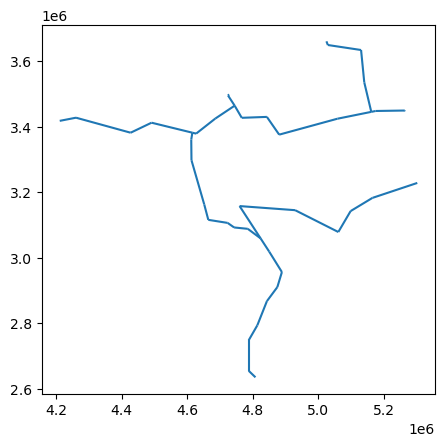

In [29]:
geoms.plot()

<Axes: >

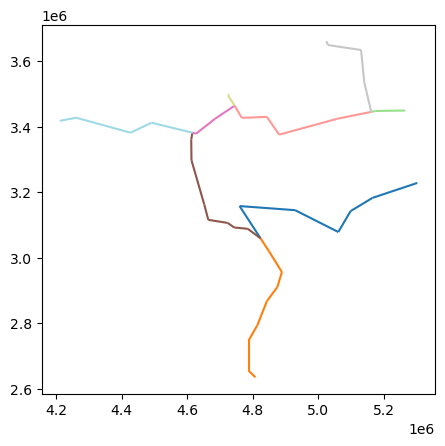

In [32]:
geoms.plot(cmap='tab20')

In [8]:
gdf

,NAME,NOTES,geometry
0,Mongol tribes,Shows areas where mass rebuilding had to be do...,"POLYGON ((5907163.518 2654794.963, 5797441.638..."
1,Poland,kingdom or duchy,"POLYGON ((4664459.064 3115557.414, 4651959.103..."
2,Lithuania,principality or duchy,"POLYGON ((5140499.245 3535347.77, 5130777.053 ..."
3,Teutonic Knights,prussian roots,"POLYGON ((4724528.321 3495417.339, 4728020.651..."
4,Holy Roman Empire,None,"POLYGON ((4615774.889 3381575.08, 4612375.893 ..."
5,Kingdom of Denmark,None,"POLYGON ((4195363.306 3521111.703, 4238418.727..."


In [33]:
left = gdf.NAME.iloc[left]
right = gdf.NAME.iloc[right]

In [34]:
left

0        Mongol tribes
0        Mongol tribes
1               Poland
1               Poland
1               Poland
1               Poland
2            Lithuania
3     Teutonic Knights
4    Holy Roman Empire
Name: NAME, dtype: object

In [35]:
right

1                Poland
4     Holy Roman Empire
2             Lithuania
3      Teutonic Knights
4     Holy Roman Empire
5    Kingdom of Denmark
3      Teutonic Knights
5    Kingdom of Denmark
5    Kingdom of Denmark
Name: NAME, dtype: object